In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as pg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [387]:
try:
    conn=pg.connect("dbname='footballstats' user='rschen1' password='password' host = 'fantasytweets.ckjgi4dhbxfi.us-east-2.rds.amazonaws.com' port = '5432'")
except:
    print("I am unable to connect to the database.")
cur = conn.cursor()

In [100]:
cur.execute("SELECT player_name, nfl_year, AVG(fant_pt) FROM  main_players GROUP BY nfl_year, player_name, pos HAVING pos = 'QB';")
qb = cur.fetchall()

In [101]:
qb = pd.DataFrame(data=qb, columns = ['name', 'year', 'avg_fant_pt'])

In [102]:
qb

,name,year,avg_fant_pt
0,Matthew Stafford,2009,12.348000
1,Chad Henne,2011,14.980000
2,Kellen Clemens,2009,0.510000
3,Peyton Manning,2015,9.136000
4,Paxton Lynch,2016,9.460000
...,...,...,...
641,Kellen Moore,2015,11.020000
642,John Beck,2011,12.155000
643,Jimmy Garoppolo,2017,14.483333
644,Ben Roethlisberger,2011,14.405333


In [149]:
qb_separated = [pd.DataFrame(y) for x, y in qb.groupby('name', as_index=False)]

In [215]:
qb_data = []
for i in qb_separated: 
    if len(i) > 3: 
        qb_data.append(i)

In [452]:
predicted_values = []
actual_values = []
for qb_year in qb_data: 
    qb_year = qb_year.sort_values('year')
    qb_year['diff_fant_pt'] = qb_year['avg_fant_pt'].diff()
    qb_year['diff_fant_pt'].fillna(0, inplace=True)
    train_data = qb_year[:len(qb_year)-1]
    test_data = qb_year[len(qb_year)-1:]
    model = ARIMA(train_data['diff_fant_pt'], order = (1,0,0))
    result = model.fit()
    predictions = result.predict(0, 0, typ = 'levels').rename('Predictions')
    predicted_values.append(predictions.values[0])
    actual_values.append(test_data['diff_fant_pt'].values[0])

In [236]:
len(predicted_values)

70

In [237]:
len(actual_values)

70

In [240]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse

In [367]:
mean_squared_error(predicted_values, actual_values)

46.6606642228734

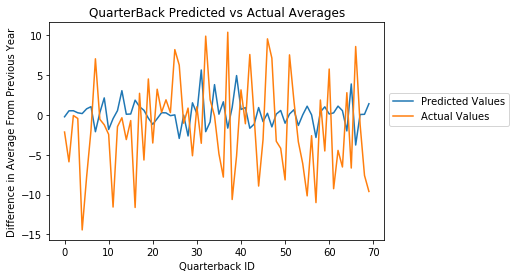

In [453]:
plt.title('QuarterBack Predicted vs Actual Averages')
plt.plot(predicted_values, label='Predicted Values')
plt.plot(actual_values, label='Actual Values')
plt.xlabel('Quarterback ID')
plt.ylabel('Difference in Average From Previous Year')
plt.legend(loc='best', bbox_to_anchor=[1, 0.7])

In [369]:
rmse(predicted_values, actual_values)

6.830861162611447

In [209]:
print(qb_data[-1])

             name  year  avg_fant_pt
11   Tyrod Taylor  2012     2.637143
21   Tyrod Taylor  2018    10.355000
33   Tyrod Taylor  2019     0.752500
172  Tyrod Taylor  2017    14.844000
439  Tyrod Taylor  2013     1.693333
447  Tyrod Taylor  2016    17.808000
508  Tyrod Taylor  2015    19.200000


In [219]:
cur.execute("SELECT player_name, nfl_year, AVG(fant_pt) FROM  main_players GROUP BY nfl_year, player_name, pos HAVING pos = 'RB';")
rb = cur.fetchall()
rb = pd.DataFrame(data=rb, columns = ['name', 'year', 'avg_fant_pt'])

In [220]:
rb_separated = [pd.DataFrame(y) for x, y in rb.groupby('name', as_index=False)]

In [221]:
rb_data = []
for i in rb_separated: 
    if len(i) > 3: 
        rb_data.append(i)

In [450]:
predicted_values = []
actual_values = []
for rb_year in rb_data: 
    try:
        rb_year = rb_year.sort_values('year')
        rb_year['diff_fant_pt'] = rb_year['avg_fant_pt'].diff()
        rb_year['diff_fant_pt'].fillna(0, inplace=True)
        train_data = rb_year[:len(rb_year)-1]
        test_data = rb_year[len(rb_year)-1:]
        model = ARIMA(train_data['diff_fant_pt'], order = (1,0,0))
        result = model.fit()
        predictions = result.predict(0, 0, typ = 'levels').rename('Predictions')
        predicted_values.append(predictions.values[0])
        actual_values.append(test_data['diff_fant_pt'].values[0])
    except:
        print('not stationary')

not stationary
not stationary


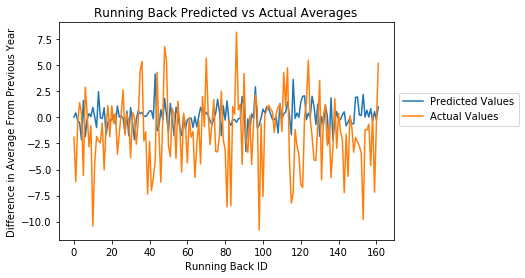

In [451]:
plt.title('Running Back Predicted vs Actual Averages')
plt.plot(predicted_values, label='Predicted Values')
plt.plot(actual_values, label='Actual Values')
plt.xlabel('Running Back ID')
plt.ylabel('Difference in Average From Previous Year')
plt.legend(loc='best', bbox_to_anchor=[1,0.7])

In [443]:
mean_squared_error(predicted_values, actual_values)

16.462711780856534

In [444]:
rmse(predicted_values, actual_values)

4.057426743744924

In [266]:
cur.execute("SELECT player_name, nfl_year, AVG(fant_pt) FROM  main_players GROUP BY nfl_year, player_name, pos HAVING pos = 'WR';")
wr = cur.fetchall()


In [267]:
wr = pd.DataFrame(data=wr, columns = ['name', 'year', 'avg_fant_pt'])
wr_separated = [pd.DataFrame(y) for x, y in wr.groupby('name', as_index=False)]

In [268]:
wr_data = []
for i in wr_separated: 
    if len(i) > 3: 
        wr_data.append(i)


In [446]:
predicted_values = []
actual_values = []
non_stationary = 0
for wr_year in wr_data: 
    try:
        wr_year = wr_year.sort_values('year')
        wr_year['diff_fant_pt'] = wr_year['avg_fant_pt'].diff()
        wr_year['diff_fant_pt'].fillna(0, inplace=True)
        train_data = wr_year[:len(wr_year)-1]
        test_data = wr_year[len(wr_year)-1:]
        model = ARIMA(train_data['diff_fant_pt'], order = (1,0,0))
        result = model.fit()
        predictions = result.predict(0, 0, typ = 'levels').rename('Predictions')
        predicted_values.append(predictions.values[0])
        actual_values.append(test_data['diff_fant_pt'].values[0])
    except:
        #predicted_values.append(0)
        #actual_values.append(0)
        non_stationary += 1
        print(non_stationary, 'cases')

1 cases
2 cases
3 cases


In [447]:
mean_squared_error(predicted_values, actual_values)

9.04294107338203

In [448]:
rmse(predicted_values, actual_values)

3.007148329128783

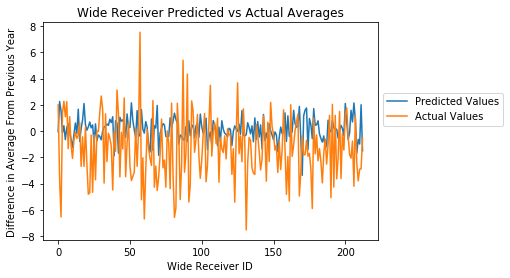

In [449]:
plt.title('Wide Receiver Predicted vs Actual Averages')
plt.plot(predicted_values, label='Predicted Values')
plt.plot(actual_values, label='Actual Values')
plt.xlabel('Wide Receiver ID')
plt.ylabel('Difference in Average From Previous Year')
plt.legend(loc='best', bbox_to_anchor=[1,0.7])

In [384]:
residuals = []
for i in range(len(predicted_values)): 
    residuals.append(predicted_values[i] - actual_values[i])

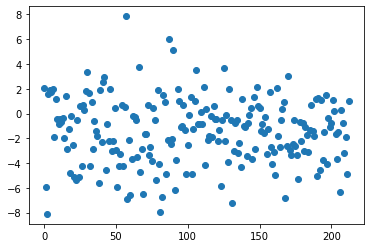

In [419]:
i = range(len(residuals))
plt.scatter(i, residuals)

In [388]:
cur.execute("SELECT count(*), player_year FROM main_players GROUP BY player_year, pos HAVING pos = 'RB';")
rb_dist = cur.fetchall()

In [396]:
rb_dist = pd.DataFrame(data=rb_dist, columns=['count', 'player_year'])
rb_dist = rb_dist.sort_values('player_year')

In [421]:
cur.execute("SELECT player_name, nfl_year, AVG(fant_pt) FROM  main_players GROUP BY nfl_year, player_name, pos HAVING pos = 'TE';")
te = cur.fetchall()
te = pd.DataFrame(data=te, columns = ['name', 'year', 'avg_fant_pt'])
te_separated = [pd.DataFrame(y) for x, y in te.groupby('name', as_index=False)]
te_data = []
for i in te_separated: 
    if len(i) > 3: 
        te_data.append(i)

In [457]:
predicted_values = []
actual_values = []
non_stationary = 0
for te_year in te_data: 
    try:
        te_year = te_year.sort_values('year')
        te_year['diff_fant_pt'] = te_year['avg_fant_pt'].diff()
        te_year['diff_fant_pt'].fillna(0, inplace=True)
        train_data = te_year[:len(te_year)-1]
        test_data = te_year[len(te_year)-1:]
        model = ARIMA(train_data['diff_fant_pt'], order = (1,0,0))
        result = model.fit()
        predictions = result.predict(0, 0, typ = 'levels').rename('Predictions')
        predicted_values.append(predictions.values[0])
        actual_values.append(test_data['diff_fant_pt'].values[0])
    except:
        #predicted_values.append(0)
        #actual_values.append(0)
        non_stationary += 1
        print(non_stationary, 'cases')

1 cases
2 cases


In [459]:
a = np.array(predicted_values)
print(a.max())
for i in range(len(a)): 
    if a[i] == a.max(): 
        print(i)
print(predicted_values)
print()
print(actual_values)

419.2719892273652
44
[0.25534432768488624, -0.2619738396967585, -0.7844169502520697, 0.8723181955318753, -0.04482936838906408, 0.20963233538321221, -0.08759759818874703, 0.27068706197576387, -0.20871015218311897, 0.19421052925942658, -1.174828362174377, -0.973747638965975, 1.5223341703851194, -0.12248941168963003, 0.5924558874806707, -0.9044642813068211, 0.007045096702518403, -0.6768342497326615, 0.9099045974961603, -0.07888889331522855, -1.965250862103941, -0.30919320503172965, -0.9178560412440595, 0.2988659729077987, 0.42677976138680807, 0.43731941133432256, 0.1922525924682134, -0.06105059598430663, 1.210130667099765, -0.4538948102406264, 0.14457808551039816, 1.3105427227396431, 0.20641615439037378, 0.5311653350514302, 1.0085937600345096, -0.13049186372727553, 0.6445218844621711, -0.16200952045872843, -0.3396108872945103, 1.0525409898659317, 0.6890608877893812, 0.14633061377197254, 0.4297222146432182, -0.02320725168201992, 419.2719892273652, 0.7733744040916052, -0.22739290362217723, 

In [460]:
del predicted_values[44]

In [461]:
del actual_values[44]

In [462]:
mean_squared_error(predicted_values, actual_values)

4.810534279925752

In [463]:
rmse(predicted_values, actual_values)

2.193293021902398

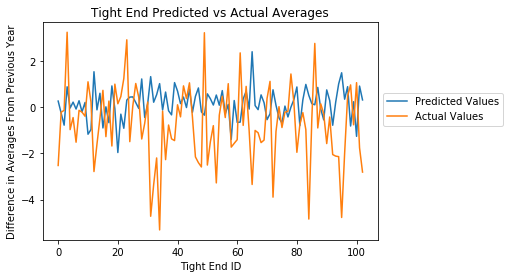

In [464]:
plt.title('Tight End Predicted vs Actual Averages')
plt.plot(predicted_values, label='Predicted Values')
plt.plot(actual_values, label='Actual Values')
plt.xlabel('Tight End ID')
plt.ylabel('Difference in Averages From Previous Year')
plt.legend(loc='best', bbox_to_anchor=[1,0.7])

In [455]:
mean_squared_error(predicted_values, actual_values)

46.6606642228734

In [456]:
rmse(predicted_values, actual_values)

6.830861162611447

Text(0, 0.5, 'Number of Games Played')

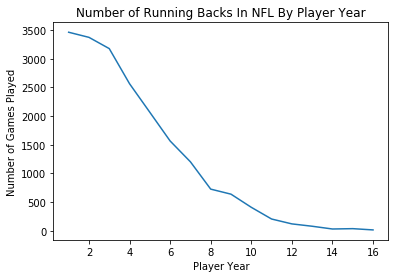

In [406]:
plt.plot(rb_dist['player_year'], rb_dist['count'])
plt.title('Number of Running Backs In NFL By Player Year')
plt.xlabel('Player Year')
plt.ylabel('Number of Games Played')

In [411]:
cur.execute("SELECT count(*), player_year FROM main_players GROUP BY player_year, pos HAVING pos = 'WR';")
wr_dist = cur.fetchall()

Text(0, 0.5, 'Number of Games Played')

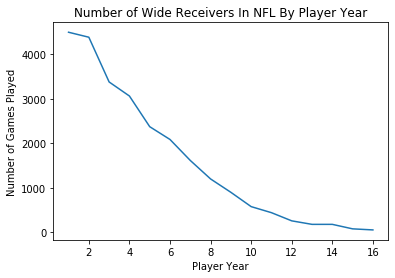

In [412]:
wr_dist = pd.DataFrame(data=wr_dist, columns=['count', 'player_year'])
wr_dist = wr_dist.sort_values('player_year')
plt.plot(wr_dist['player_year'], wr_dist['count'])
plt.title('Number of Wide Receivers In NFL By Player Year')
plt.xlabel('Player Year')
plt.ylabel('Number of Games Played')

In [413]:
cur.execute("SELECT count(*), player_year FROM main_players GROUP BY player_year, pos HAVING pos = 'QB';")
qb_dist = cur.fetchall()

Text(0, 0.5, 'Number of Games Played')

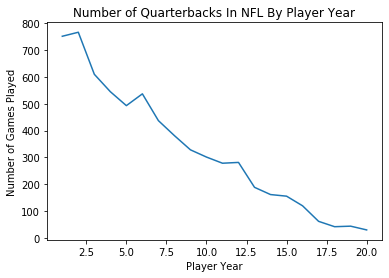

In [414]:
qb_dist = pd.DataFrame(data=qb_dist, columns=['count', 'player_year'])
qb_dist = qb_dist.sort_values('player_year')
plt.plot(qb_dist['player_year'], qb_dist['count'])
plt.title('Number of Quarterbacks In NFL By Player Year')
plt.xlabel('Player Year')
plt.ylabel('Number of Games Played')

In [466]:
cur.execute("SELECT count(*), player_year FROM main_players GROUP BY player_year, pos HAVING pos = 'TE';")
te_dist = cur.fetchall()

Text(0, 0.5, 'Number of Games Played')

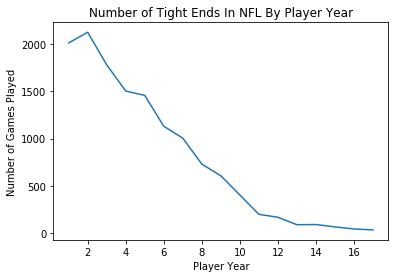

In [467]:
te_dist = pd.DataFrame(data=te_dist, columns=['count', 'player_year'])
te_dist = te_dist.sort_values('player_year')
plt.plot(te_dist['player_year'], te_dist['count'])
plt.title('Number of Tight Ends In NFL By Player Year')
plt.xlabel('Player Year')
plt.ylabel('Number of Games Played')